# Loading datasets from database

In [2]:
!python3 -m pip install --upgrade 'sqlalchemy < 2.0'

In [4]:
import pandas as pd
import sqlalchemy

print(pd.__version__)
print(sqlalchemy.__version__)

1.3.5
1.4.54


In [6]:
import pandas as pd
from dotenv import load_dotenv
import os

load_dotenv()

DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

DATABASE_URL = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(DATABASE_URL)

user_data = pd.read_sql(
    """SELECT * FROM public.user_data""",
    con=engine)

user_data

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [7]:
post_text_df = pd.read_sql(
    """SELECT * FROM public.post_text_df""",
    con=engine)

post_text_df

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [10]:
feed_data = pd.read_sql(
    """SELECT * FROM public.feed_data 
        limit 5000000
    """,
    con=engine)

feed_data

,timestamp,user_id,post_id,action,target
0,2021-12-09 10:15:45,65804,6945,view,0
1,2021-12-09 10:17:53,65804,744,view,0
2,2021-12-09 10:19:45,65804,5277,view,0
3,2021-12-09 10:22:31,65804,3399,view,0
4,2021-12-09 10:24:28,65804,2798,view,0
...,...,...,...,...,...
4999995,2021-10-29 11:38:25,2941,927,view,0
4999996,2021-10-29 11:40:56,2941,259,view,0
4999997,2021-10-29 11:43:49,2941,3064,view,0
4999998,2021-10-29 11:45:03,2941,310,view,0


In [11]:
### checking balance of classes in target

feed_data['target'].value_counts()

0    4467693
1     532307
Name: target, dtype: int64

# Analysing column "text" in post_text_df

In [15]:
print(post_text_df.loc[67, 'text'])

High fuel costs hit US airlines

Two of the largest airlines in the US - American and Southwest - have blamed record fuel prices for their disappointing quarterly results.

American Airlines parent AMR reported a loss of $387m (£206m) for the fourth quarter of 2004, against a $111m loss for the same period a year earlier. Meanwhile, Southwest Airlines saw its fourth-quarter 2004 profits fall 15% to $56m, against $66m a year earlier. Both said high fuel bills would continue to pressure revenues in 2005. American, the worlds biggest airline by some measures, said it expected to report a loss for the first quarter of 2005. Southwest, which has the highest market value of any US carrier, said it would remain profitable despite high fuel prices.

AMRs shares were flat in Wednesday morning trading on the New York Stock Exchange, as the results were slightly better than analysts had anticipated. AMRs chief executive Gerard Arpey said the airlines difficulties reflected the situation within th

In [17]:
print(post_text_df.loc[876, 'text'])

.@AITCofficial MLA Samaresh Das passes away due to #COVID19

https://t.co/JOJdheLSM5


In [19]:
print(post_text_df.loc[5000, 'text'])

Truly a great film... I stumbled onto it at the video store and rented it because Aaron Eckhart (In the Company of Men and Your Friends and Neighbors) was in it as well as Paulina Porizcova... The lovely former SI swimsuit model does get nude in the film, but that is only one of the many reasons to rent it... Its very exciting, and the character development is fantastic... Eckhart is one of the most underrated actors working, and he steals this film... It is very dark and violent, but I enjoyed in immensely....


In [21]:
### by seeing some of the posts, I think it makes sense to extract couple of features:
### 1) length of post
### 2) number of hashtags
### 3) number of mentions @
### 4) if has a hashtag
### 5) if has an http url

In [23]:
post_text_df['post_length'] = post_text_df['text'].apply(len)

In [25]:
post_text_df['num_hashtags'] = post_text_df['text'].apply(lambda x: x.count('#'))

In [27]:
post_text_df['num_mentions'] = post_text_df['text'].apply(lambda x: x.count('@'))

In [29]:
post_text_df['has_hashtag'] = post_text_df['text'].apply(lambda x: '#' in x)

In [31]:
post_text_df['has_url'] = post_text_df['text'].apply(lambda x: 'http' in x)

In [33]:
### didn't use it yet
###from sklearn.feature_extraction.text import TfidfVectorizer

### tfidf_vectorizer = TfidfVectorizer(
### stop_words='english')

### tfidf_matrix = tfidf_vectorizer.fit_transform(post_text_df['text'])

# Deep learning improvements

In [36]:
### 1. BERT-based Vectorization of Posts & Feature Extraction

In [38]:
from sentence_transformers import SentenceTransformer

In [40]:
### Loading BERT model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

In [42]:
### Getting BERT embeddings

from tqdm import tqdm

# Apply tqdm to track encoding progress
tqdm.pandas(desc="Encoding Posts with BERT")

# Getting BERT embeddings with progress bar
post_text_df['post_embedding'] = post_text_df['text'].progress_apply(lambda x: bert_model.encode(x))

Encoding Posts with BERT: 100%|█████████████| 7023/7023 [04:45<00:00, 24.58it/s]


In [46]:
import numpy as np
# Converting embeddings into new features (mean, max, min)
post_text_df['embedding_mean'] = post_text_df['post_embedding'].apply(lambda x: np.mean(x))
post_text_df['embedding_max'] = post_text_df['post_embedding'].apply(lambda x: np.max(x))
post_text_df['embedding_min'] = post_text_df['post_embedding'].apply(lambda x: np.min(x))

In [64]:
# Drop raw embeddings (optional)
post_text_df.drop(columns=['post_embedding'], inplace=True)

In [66]:
post_text_df

,post_id,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,1,business,1967,0,0,False,False,-0.000771,0.150771,-0.140247
1,2,business,2701,0,0,False,False,-0.001662,0.144552,-0.151125
2,3,business,3408,0,0,False,False,-0.001554,0.143036,-0.144040
3,4,business,1026,0,0,False,False,-0.000081,0.137932,-0.174149
4,5,business,889,0,0,False,False,0.000010,0.162679,-0.154663
...,...,...,...,...,...,...,...,...,...,...
7018,7315,movie,803,0,0,False,False,-0.000816,0.164095,-0.128535
7019,7316,movie,800,0,0,False,False,-0.001117,0.138495,-0.138613
7020,7317,movie,636,0,0,False,False,-0.000882,0.152540,-0.209523
7021,7318,movie,728,0,0,False,False,-0.000055,0.187223,-0.138941


In [50]:
post_text_df = post_text_df.drop('text', axis=1)

# Merging datasets

In [68]:
df = pd.merge(
    feed_data,
    user_data,
    on='user_id',
    how='left'
)

df.head()

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,os,source
0,2021-12-09 10:15:45,65804,6945,view,0,1,18,Russia,Nizhneudinsk,3,iOS,ads
1,2021-12-09 10:17:53,65804,744,view,0,1,18,Russia,Nizhneudinsk,3,iOS,ads
2,2021-12-09 10:19:45,65804,5277,view,0,1,18,Russia,Nizhneudinsk,3,iOS,ads
3,2021-12-09 10:22:31,65804,3399,view,0,1,18,Russia,Nizhneudinsk,3,iOS,ads
4,2021-12-09 10:24:28,65804,2798,view,0,1,18,Russia,Nizhneudinsk,3,iOS,ads


In [70]:
data = pd.merge(
    df,
    post_text_df,
    on='post_id',
    how='left'
)
data

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,...,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-09 10:15:45,65804,6945,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,movie,1154,0,0,False,False,0.000461,0.141381,-0.159577
1,2021-12-09 10:17:53,65804,744,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,entertainment,2485,0,0,False,False,-0.000720,0.146177,-0.193814
2,2021-12-09 10:19:45,65804,5277,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,movie,304,0,0,False,False,-0.000553,0.169826,-0.159393
3,2021-12-09 10:22:31,65804,3399,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,covid,139,1,2,True,True,-0.000557,0.156297,-0.139253
4,2021-12-09 10:24:28,65804,2798,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,covid,140,1,1,True,True,-0.001004,0.173328,-0.167320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2021-10-29 11:38:25,2941,927,view,0,0,19,Russia,Voronezh,1,...,ads,entertainment,1440,0,0,False,False,0.000566,0.159374,-0.124330
4999996,2021-10-29 11:40:56,2941,259,view,0,0,19,Russia,Voronezh,1,...,ads,business,1102,0,0,False,False,-0.000666,0.126410,-0.141039
4999997,2021-10-29 11:43:49,2941,3064,view,0,0,19,Russia,Voronezh,1,...,ads,covid,140,2,0,True,True,-0.000780,0.155152,-0.145533
4999998,2021-10-29 11:45:03,2941,310,view,0,0,19,Russia,Voronezh,1,...,ads,business,1602,0,0,False,False,-0.001289,0.147496,-0.133039


# Analysing numeric and categorical columns

In [73]:
### checking numeric columns
import numpy as np

numeric_columns = data.loc[:,data.dtypes!=np.object_].columns
data.loc[:,data.dtypes!=np.object_].head(2)

,timestamp,user_id,post_id,target,gender,age,exp_group,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-09 10:15:45,65804,6945,0,1,18,3,1154,0,0,False,False,0.000461,0.141381,-0.159577
1,2021-12-09 10:17:53,65804,744,0,1,18,3,2485,0,0,False,False,-0.000720,0.146177,-0.193814


In [75]:
### checking categorical columns

categorical_columns = data.loc[:,data.dtypes==np.object_].columns
data.loc[:,data.dtypes==np.object_].head(2)

,action,country,city,os,source,topic
0,view,Russia,Nizhneudinsk,iOS,ads,movie
1,view,Russia,Nizhneudinsk,iOS,ads,entertainment


In [77]:
### target should eventually be removed from numeric columns

In [79]:
### gender, exp_group, has_hashtag, has_url are also categorical columns

In [81]:
### moving gender, exp_group, has_hashtag, has_url to categorical columns

categorical_as_object = ['gender', 'exp_group', 'has_hashtag', 'has_url', ] 

data[categorical_as_object] = data[categorical_as_object].astype('object')

In [83]:
### checking categorical columns

categorical_columns = data.loc[:,data.dtypes==np.object_].columns
data.loc[:,data.dtypes==np.object_].head(2)

,action,gender,country,city,exp_group,os,source,topic,has_hashtag,has_url
0,view,1,Russia,Nizhneudinsk,3,iOS,ads,movie,False,False
1,view,1,Russia,Nizhneudinsk,3,iOS,ads,entertainment,False,False


In [85]:
### checking numeric columns

numeric_columns = data.loc[:,data.dtypes!=np.object_].columns
data.loc[:,data.dtypes!=np.object_].head(2)

,timestamp,user_id,post_id,target,age,post_length,num_hashtags,num_mentions,embedding_mean,embedding_max,embedding_min
0,2021-12-09 10:15:45,65804,6945,0,18,1154,0,0,0.000461,0.141381,-0.159577
1,2021-12-09 10:17:53,65804,744,0,18,2485,0,0,-0.000720,0.146177,-0.193814


In [87]:
### correlation between numeric features

data[numeric_columns].corr()

,user_id,post_id,target,age,post_length,num_hashtags,num_mentions,embedding_mean,embedding_max,embedding_min
user_id,1.000000,-0.000672,0.001311,0.000400,-0.000101,-0.000708,-0.000527,0.000004,0.000449,0.000184
post_id,-0.000672,1.000000,0.002679,-0.022618,-0.275974,-0.025193,-0.008359,0.089548,0.004492,0.041352
target,0.001311,0.002679,1.000000,-0.001451,-0.003473,-0.002992,-0.001068,0.001330,0.000762,0.001042
age,0.000400,-0.022618,-0.001451,1.000000,0.006830,0.009925,0.002522,0.003021,-0.001085,-0.004423
post_length,-0.000101,-0.275974,-0.003473,0.006830,1.000000,-0.316511,-0.192783,-0.153433,-0.020767,0.046689
num_hashtags,-0.000708,-0.025193,-0.002992,0.009925,-0.316511,1.000000,0.120334,-0.003864,-0.012387,-0.034913
num_mentions,-0.000527,-0.008359,-0.001068,0.002522,-0.192783,0.120334,1.000000,0.009797,0.021591,-0.028484
embedding_mean,0.000004,0.089548,0.001330,0.003021,-0.153433,-0.003864,0.009797,1.000000,0.036010,0.003681
embedding_max,0.000449,0.004492,0.000762,-0.001085,-0.020767,-0.012387,0.021591,0.036010,1.000000,0.092365
embedding_min,0.000184,0.041352,0.001042,-0.004423,0.046689,-0.034913,-0.028484,0.003681,0.092365,1.000000


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


<Axes: >

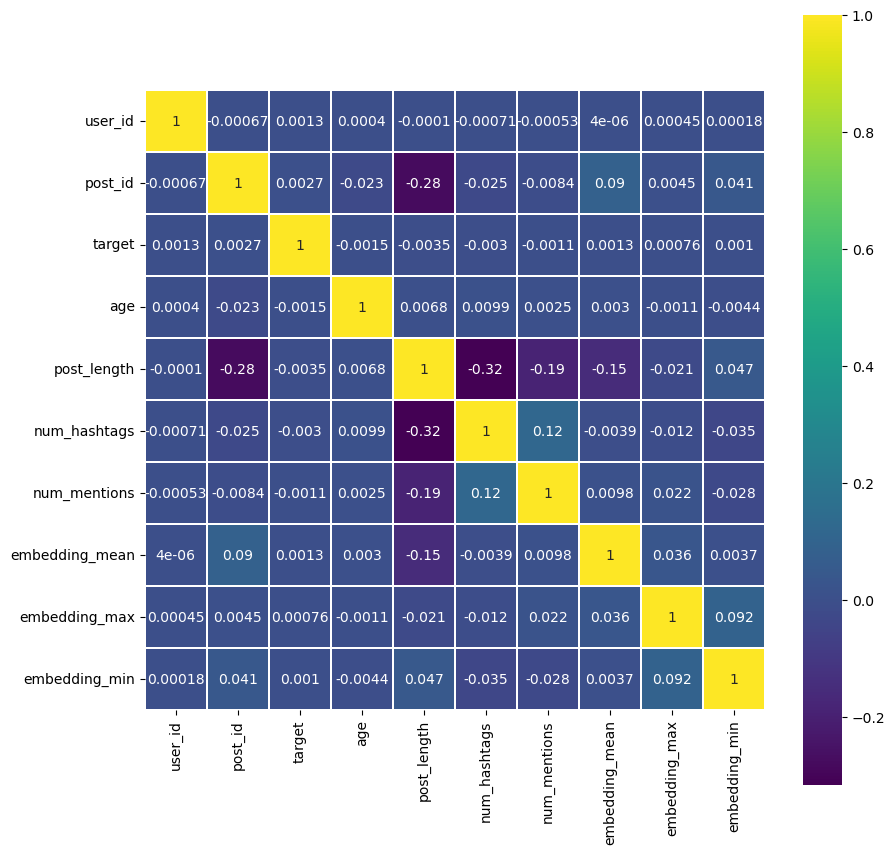

In [89]:
### correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

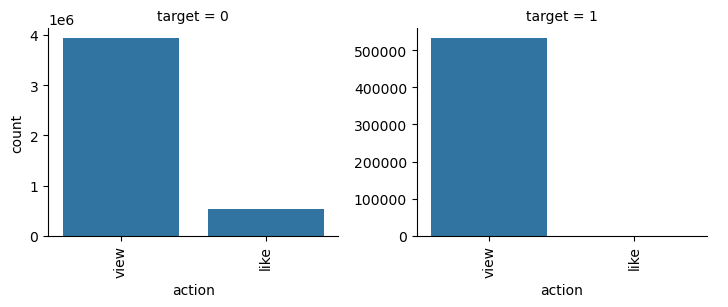

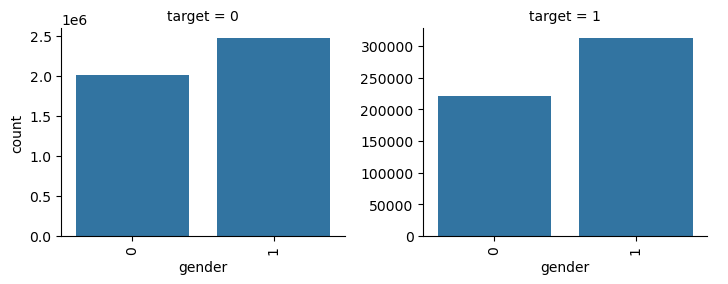

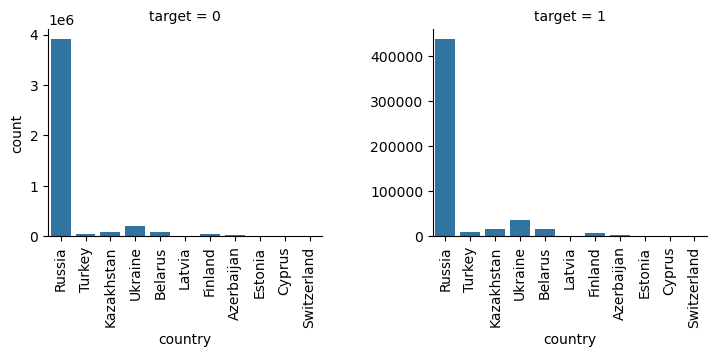

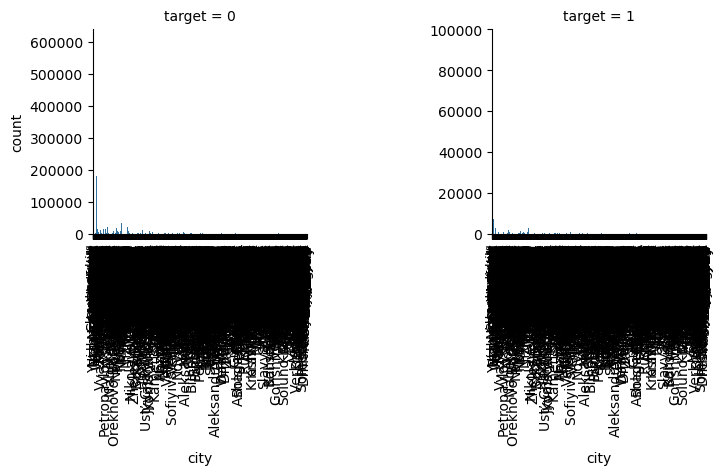

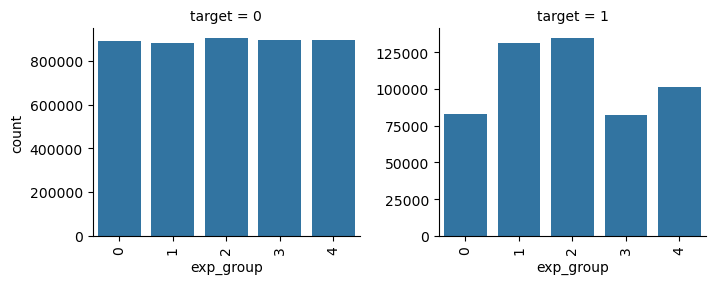

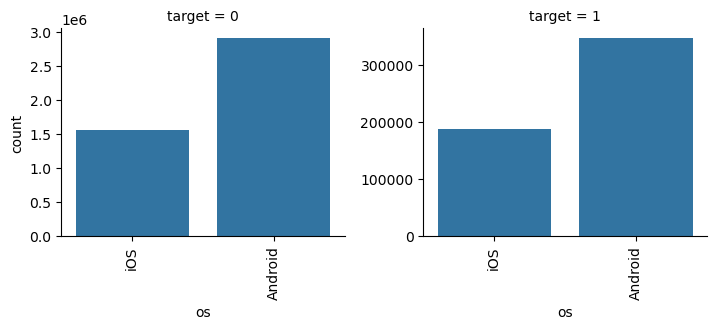

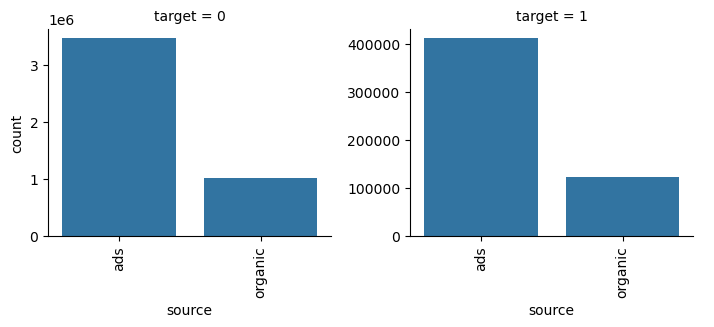

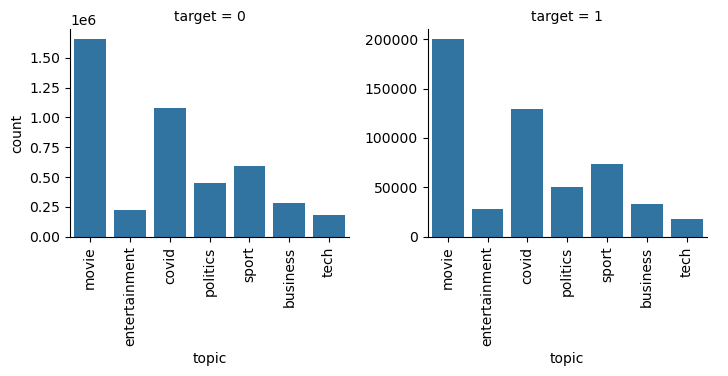

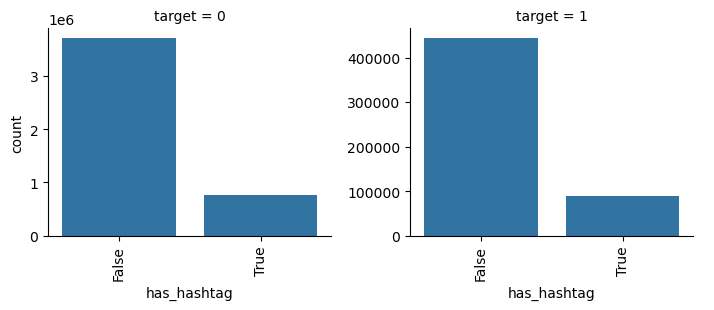

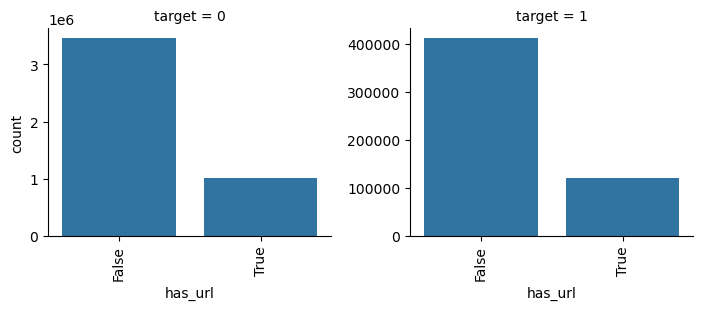

In [91]:
### Histograms of distribution between classes

for col in categorical_columns:
    g = sns.catplot(x=col, kind='count', col='target', data=data, sharey=False, height=3, aspect=1.2)
    g.set_xticklabels(rotation=90)

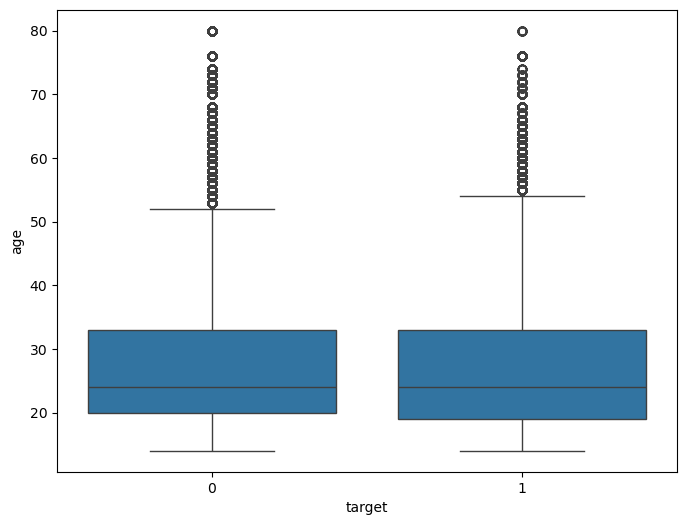

In [92]:
### distribution of age vs target

fig = plt.figure()
fig.set_size_inches(8,6)
sns.boxplot(y=data['age'], x=data['target'].astype('category'), data = data)
plt.show()

In [93]:
### check nans

data.isna().sum()

timestamp         0
user_id           0
post_id           0
action            0
target            0
gender            0
age               0
country           0
city              0
exp_group         0
os                0
source            0
topic             0
post_length       0
num_hashtags      0
num_mentions      0
has_hashtag       0
has_url           0
embedding_mean    0
embedding_max     0
embedding_min     0
dtype: int64

In [97]:
data

,timestamp,user_id,post_id,action,target,gender,age,country,city,exp_group,...,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
0,2021-12-09 10:15:45,65804,6945,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,movie,1154,0,0,False,False,0.000461,0.141381,-0.159577
1,2021-12-09 10:17:53,65804,744,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,entertainment,2485,0,0,False,False,-0.000720,0.146177,-0.193814
2,2021-12-09 10:19:45,65804,5277,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,movie,304,0,0,False,False,-0.000553,0.169826,-0.159393
3,2021-12-09 10:22:31,65804,3399,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,covid,139,1,2,True,True,-0.000557,0.156297,-0.139253
4,2021-12-09 10:24:28,65804,2798,view,0,1,18,Russia,Nizhneudinsk,3,...,ads,covid,140,1,1,True,True,-0.001004,0.173328,-0.167320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,2021-10-29 11:38:25,2941,927,view,0,0,19,Russia,Voronezh,1,...,ads,entertainment,1440,0,0,False,False,0.000566,0.159374,-0.124330
4999996,2021-10-29 11:40:56,2941,259,view,0,0,19,Russia,Voronezh,1,...,ads,business,1102,0,0,False,False,-0.000666,0.126410,-0.141039
4999997,2021-10-29 11:43:49,2941,3064,view,0,0,19,Russia,Voronezh,1,...,ads,covid,140,2,0,True,True,-0.000780,0.155152,-0.145533
4999998,2021-10-29 11:45:03,2941,310,view,0,0,19,Russia,Voronezh,1,...,ads,business,1602,0,0,False,False,-0.001289,0.147496,-0.133039


# Train and test sample

In [99]:
sorted_data = data.sort_values('timestamp')

In [102]:
sorted_data = sorted_data.drop(['action', 'timestamp', 'post_id', 'user_id'], axis=1)

In [112]:
train = sorted_data.iloc[:-1000000].copy() 
test = sorted_data.iloc[-1000000:].copy() 

In [114]:
train

,target,gender,age,country,city,exp_group,os,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
567735,1,0,30,Russia,Cheboksary,1,iOS,ads,movie,482,0,0,False,False,-0.001184,0.134976,-0.158968
152604,0,1,23,Russia,Sochi,2,Android,organic,covid,138,5,1,True,True,-0.001010,0.121286,-0.156022
3163458,1,1,47,Russia,Volsk,4,Android,ads,covid,135,5,0,True,True,-0.001218,0.172017,-0.153606
647941,1,0,29,Russia,Ryazan,3,iOS,ads,business,2816,0,0,False,False,-0.001302,0.154058,-0.136557
41203,0,0,37,Russia,Stroitel,0,Android,ads,politics,1372,0,0,False,False,-0.001530,0.170645,-0.158475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282447,0,1,16,Ukraine,Dovzhansk,4,Android,ads,movie,1368,0,0,False,False,-0.000968,0.145872,-0.154272
2795615,0,1,37,Russia,Vladivostok,0,iOS,ads,politics,3080,0,0,False,False,-0.000457,0.149454,-0.144992
1114716,0,0,19,Russia,Donetsk,2,Android,organic,politics,3827,0,0,False,False,-0.001053,0.124215,-0.154348
534193,0,1,26,Russia,Mtsensk,0,Android,organic,covid,140,2,0,True,True,-0.000366,0.125968,-0.152815


In [116]:
test

,target,gender,age,country,city,exp_group,os,source,topic,post_length,num_hashtags,num_mentions,has_hashtag,has_url,embedding_mean,embedding_max,embedding_min
2070656,0,0,20,Russia,Bezymyannoye,1,Android,organic,sport,2172,0,0,False,False,0.000400,0.152444,-0.152545
2717605,0,1,24,Russia,Tver,1,iOS,ads,sport,1349,0,0,False,False,-0.001151,0.150519,-0.164872
2651972,0,0,44,Russia,Moscow,1,Android,ads,covid,123,0,0,False,True,0.000714,0.150555,-0.189947
1960898,0,1,22,Russia,Ussuriysk,1,Android,ads,covid,138,0,2,False,True,-0.000468,0.155074,-0.187812
3461407,0,1,30,Belarus,Minsk,4,Android,ads,movie,247,0,0,False,False,0.000114,0.175698,-0.174304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558094,0,0,18,Russia,Lipetsk,4,Android,ads,movie,694,0,0,False,False,-0.000824,0.137459,-0.166198
4086026,0,1,17,Russia,Moscow,4,iOS,ads,movie,1603,0,0,False,False,-0.001295,0.154850,-0.132246
4493346,0,1,18,Russia,Lipetsk,3,Android,organic,movie,1325,0,0,False,False,-0.000287,0.159744,-0.146907
3878753,0,1,17,Russia,Omsk,3,Android,organic,movie,1295,0,0,False,False,0.000701,0.117174,-0.167402


In [118]:
### Seperating data on features and target

X_train = train.drop('target', axis=1)
X_test = test.drop('target', axis=1)

y_train = train['target']
y_test = test['target']

# Transformer for categorical and numeric columns

In [121]:
categorical_columns

Index(['action', 'gender', 'country', 'city', 'exp_group', 'os', 'source',
       'topic', 'has_hashtag', 'has_url'],
      dtype='object')

In [123]:
categorical_columns = categorical_columns.difference(['action'])

In [125]:
categorical_columns

Index(['city', 'country', 'exp_group', 'gender', 'has_hashtag', 'has_url',
       'os', 'source', 'topic'],
      dtype='object')

In [127]:
numeric_columns

Index(['timestamp', 'user_id', 'post_id', 'target', 'age', 'post_length',
       'num_hashtags', 'num_mentions', 'embedding_mean', 'embedding_max',
       'embedding_min'],
      dtype='object')

In [129]:
list(X_train.select_dtypes(include=['float64', 'int64']).columns)

['age', 'post_length', 'num_hashtags', 'num_mentions']

In [147]:
numeric_cols = list(X_train.select_dtypes(include=['float64', 'int64']).columns)

print(numeric_cols)

['age', 'post_length', 'num_hashtags', 'num_mentions']


In [149]:
# Ensure 'embedding_mean', 'embedding_max', 'embedding_min' are included
required_numeric_cols = ['embedding_mean', 'embedding_max', 'embedding_min']
numeric_cols = list(set(numeric_cols) | set(required_numeric_cols))  # Union of sets

print(numeric_cols)

['age', 'embedding_min', 'embedding_max', 'embedding_mean', 'post_length', 'num_mentions', 'num_hashtags']


In [151]:
### creating transformer for categorical features

from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler

### Your code is here

### saving the cols for OHE, mean target encoders, numeric cols

cols_for_ohe = [x for x in categorical_columns if X_train[x].nunique() < 5]
cols_for_mte = [x for x in categorical_columns if X_train[x].nunique() >= 5]

### saving indeces of these cols

cols_for_ohe_idx = [list(X_train.columns).index(col) for col in cols_for_ohe]
cols_for_mte_idx = [list(X_train.columns).index(col) for col in cols_for_mte]
numeric_cols_idx = [list(X_train.columns).index(col) for col in numeric_cols]

In [153]:
t = [('OneHotEncoder', OneHotEncoder(), cols_for_ohe_idx), ### indices are added here. best to add as list of indices. not the names of cols
     ('MeanTargetEncoder', TargetEncoder(), cols_for_mte_idx),
     ('StandardScaler', StandardScaler(), numeric_cols_idx)]

col_transform = ColumnTransformer(transformers=t)

In [155]:
np.random.seed(1)

col_transform.fit(X_train, y_train)

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 [0, 11, 12, 5, 6]),
                                ('MeanTargetEncoder', TargetEncoder(),
                                 [3, 2, 4, 7]),
                                ('StandardScaler', StandardScaler(),
                                 [1, 15, 14, 13, 8, 10, 9])])

# Decision Tree with default parameters

In [157]:
### model for Decision Tree with default parameters
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Your code is here
np.random.seed(1)
pipe_dt = Pipeline([("column_transformer", 
                     col_transform), 
                    ("decision_tree", 
                     DecisionTreeClassifier())])

start_time = time.time()

pipe_dt.fit(X_train, y_train)

training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")

Training time: 57.29 seconds


In [158]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted').round(3)


print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)
print("F1 score test:", f1)

Accuracy train: 0.8970535
Accuracy test: 0.879479
F1 score test: 0.823


# Catboost model

In [163]:
### building catboost model

from catboost import CatBoostClassifier

np.random.seed(1)

catboost = CatBoostClassifier(iterations=100)

start_time = time.time()

catboost.fit(X_train, y_train, cat_features=['gender', 'country', 'city', 'exp_group', 'os', 'source',
       'topic', 'has_hashtag','has_url'])

training_time = time.time() - start_time

print(f"Training time: {training_time:.2f} seconds")

Learning rate set to 0.5
0:	learn: 0.4546919	total: 683ms	remaining: 1m 7s
1:	learn: 0.3762341	total: 1.16s	remaining: 57s
2:	learn: 0.3457828	total: 1.65s	remaining: 53.3s
3:	learn: 0.3345246	total: 1.87s	remaining: 44.8s
4:	learn: 0.3303093	total: 2.19s	remaining: 41.7s
5:	learn: 0.3269650	total: 2.54s	remaining: 39.7s
6:	learn: 0.3256493	total: 2.96s	remaining: 39.4s
7:	learn: 0.3247482	total: 3.29s	remaining: 37.9s
8:	learn: 0.3244397	total: 3.64s	remaining: 36.8s
9:	learn: 0.3243422	total: 4.07s	remaining: 36.6s
10:	learn: 0.3228051	total: 4.42s	remaining: 35.8s
11:	learn: 0.3223996	total: 4.73s	remaining: 34.7s
12:	learn: 0.3220158	total: 5.12s	remaining: 34.2s
13:	learn: 0.3219540	total: 5.44s	remaining: 33.4s
14:	learn: 0.3218568	total: 5.74s	remaining: 32.5s
15:	learn: 0.3217850	total: 6.07s	remaining: 31.8s
16:	learn: 0.3217712	total: 6.37s	remaining: 31.1s
17:	learn: 0.3217612	total: 6.69s	remaining: 30.5s
18:	learn: 0.3216853	total: 6.99s	remaining: 29.8s
19:	learn: 0.32164

In [165]:
y_pred_train = catboost.predict(X_train)
y_pred_test = catboost.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test, average='weighted').round(3)


print("Accuracy train:", accuracy_train)
print("Accuracy test:", accuracy_test)
print("F1 score test:", f1)

Accuracy train: 0.8970525
Accuracy test: 0.879483
F1 score test: 0.823


In [167]:
feature_names = X_train.columns
importances = catboost.feature_importances_

# Print feature importance
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

gender: 1.3262653185511881
age: 23.032065863793232
country: 4.636970252820957
city: 14.678759756514111
exp_group: 2.6114401813449786
os: 0.0712740810464214
source: 0.061199087424808445
topic: 26.626396017607494
post_length: 6.927042946290373
num_hashtags: 1.6138180231726758
num_mentions: 0.7017051733946985
has_hashtag: 0.3486061131940874
has_url: 0.9251914885855234
embedding_mean: 5.680962873719617
embedding_max: 6.104312168107141
embedding_min: 4.653990654432703


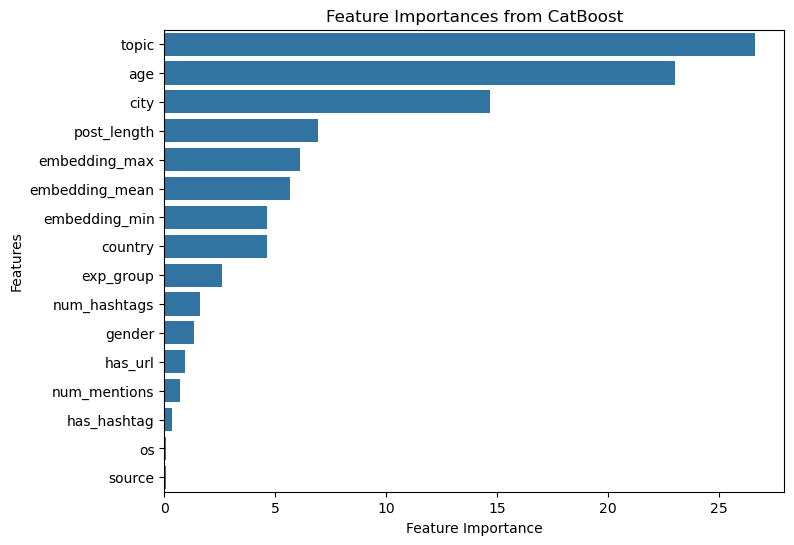

In [169]:
# DataFrame for plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', orient='h')
plt.title('Feature Importances from CatBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [171]:
catboost.save_model('catboost_model_4.cbm',
                           format="cbm")

from_file = CatBoostClassifier()  # здесь не указываем параметры, которые были при обучении, в дампе модели все есть

from_file.load_model("catboost_model_4.cbm")

from_file.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [173]:
import os
from catboost import CatBoostClassifier

def get_model_path(path: str) -> str:
    if os.environ.get("IS_LMS") == "1":  # проверяем где выполняется код в лмс, или локально. Немного магии
        MODEL_PATH = '/workdir/user_input/model'
    else:
        MODEL_PATH = path
    return MODEL_PATH


def load_models():
    model_path = get_model_path("/Users/daraluzina/ML/HW_22/Ver_2.0/catboost_model_4.cbm")  
    
    # Load CatBoost model
    model = CatBoostClassifier()
    model.load_model(model_path)
    
    return model

In [175]:
model_test = load_models()

In [177]:
model_test.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])